<a href="https://colab.research.google.com/github/tomasplsek/AstroML/blob/main/2022/03_sklearn_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. hands-on session: **From *Data* to *Prediction***

## **Contents**

1. Preprocess the data
1. Select features & reduce dimensions
1. Cross-validate
1. Find best hyperparameters
1. Compare classifiers
1. Combine classifiers
1. Evaluate performance
1. Predict

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Our dataset**

SDSS photometry of points sources: Star vs QSO

<img src="https://cdn.mos.cms.futurecdn.net/HgaCHZDNppE6e52yeDACo6-970-80.jpg.webp" height=200>

<img src="https://earthsky.org/upl/2021/01/supermassive-black-hole-artist-e1610556964639.jpg" height=200 align=right>



### **Sloan Digital Sky Survey (SDSS)**

- photometry & spectroscopy

- fotometry 1 billion objects

- spectroscopy 6 million objects

- stars from our galaxy

- galaxies up to $z \approx 0.7$

- quasars up to $z \approx 6$

- color system `u g r i z`

<img src="https://www.astroml.org/_images/fig_sdss_filters_1.png" align=left width=500>

In [ ]:
!wget -c "https://drive.google.com/uc?id=1IoQfGFo13ZP2wTyp-xvzQvguPYhE8TWB" -O "sdss_photo.csv"

--2022-10-17 12:44:15--  https://drive.google.com/uc?id=1IoQfGFo13ZP2wTyp-xvzQvguPYhE8TWB
Resolving drive.google.com (drive.google.com)... 74.125.143.102, 74.125.143.139, 74.125.143.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.143.102|:443... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; nothing to do.



## **Data preprocessing**

In [ ]:
data = pd.read_csv("sdss_photo.csv")

In [ ]:
data

,u,g,r,i,z,target
0,19.240999,17.525999,16.840000,16.613001,16.492001,star
1,19.732000,18.339001,17.767000,17.580000,17.481001,star
2,16.120001,15.232000,14.933000,14.845000,14.827000,star
3,18.995001,18.150999,17.877001,17.747000,17.766001,star
4,19.032000,18.112000,17.848000,17.709999,17.712000,star
...,...,...,...,...,...,...
862,19.247000,19.047001,18.663000,18.627001,18.671000,QSO
863,26.433001,21.429001,20.261000,20.108000,20.073000,QSO
864,20.535999,20.200001,20.292999,19.910000,19.726000,QSO
865,20.627001,20.583000,20.270000,20.229000,20.190001,QSO


In [ ]:
data.describe().round(2)

,u,g,r,i,z
count,867.00,867.00,867.00,867.00,867.00
mean,19.29,18.17,17.72,17.54,17.45
std,1.39,1.33,1.35,1.37,1.38
min,15.67,14.36,14.12,13.95,13.89
25%,18.50,17.29,16.74,16.54,16.45
50%,19.33,18.33,17.88,17.69,17.62
75%,20.02,19.09,18.76,18.61,18.52
max,26.43,25.17,21.14,20.72,20.91


In [ ]:
sum(data.target== "star"), sum(data.target == "QSO")

(655, 212)

<img src="https://drive.google.com/uc?id=1gFQWdyFW_TRVtlR4PZLAShDvdF9HGgpp" width="850px" align="left">

### task 1: **create `X` and `y`**

```python
data[["u","g","r","i","z"]] -> X
data["target"] -> y
"QSO" -> 0
"star" -> 1
```

hint: you can use [LabelEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
X = data[["u","g","r","i","z"]]
X

,u,g,r,i,z
0,19.240999,17.525999,16.840000,16.613001,16.492001
1,19.732000,18.339001,17.767000,17.580000,17.481001
2,16.120001,15.232000,14.933000,14.845000,14.827000
3,18.995001,18.150999,17.877001,17.747000,17.766001
4,19.032000,18.112000,17.848000,17.709999,17.712000
...,...,...,...,...,...
862,19.247000,19.047001,18.663000,18.627001,18.671000
863,26.433001,21.429001,20.261000,20.108000,20.073000
864,20.535999,20.200001,20.292999,19.910000,19.726000
865,20.627001,20.583000,20.270000,20.229000,20.190001


In [ ]:
y = np.array(data.target == "star").astype(int)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
le = LabelEncoder()
# le.fit(data.target)
# y = le.transform(data.target)
y = le.fit_transform(data.target)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
le.inverse_transform([0,1])

array(['QSO', 'star'], dtype=object)

### task 2: **split the data (9:1), train a linear [Support Vector Classifier (SVC)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) & test its accuracy**

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_svm_margin_002.png)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

model = SVC(kernel="linear")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=420)

In [ ]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = model.predict(X_test)
sum(y_pred == y_test) / len(y_pred)

0.9425287356321839

In [ ]:
model.score(X_test, y_test)

0.9425287356321839

### task 3: **rescale the data -> `X_scaled` & test score**

note: the data were already transformed from fluxes to magnitudes `m = -log10(F)`

```python
X_scaled = (X - μ) / σ
```

hint: you can use [`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.03431629, -0.48472471, -0.64808566, -0.67580301, -0.69718857],
       [ 0.31930584,  0.12473607,  0.03656377,  0.03011821,  0.0203667 ],
       [-2.28207913, -2.20440421, -2.05652877, -1.9664652 , -1.90520657],
       ...,
       [ 0.89835098,  1.51982126,  1.90217729,  1.73104683,  1.64919409],
       [ 0.96389084,  1.806934  ,  1.88519118,  1.96392093,  1.98584328],
       [ 0.1025233 ,  0.79116842,  0.79506994,  0.91416343,  1.0665891 ]])

In [ ]:
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
X_scaled.describe().round(2)

,u,g,r,i,z
count,867.00,867.00,867.00,867.00,867.00
mean,-0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00
min,-2.61,-2.86,-2.65,-2.62,-2.59
25%,-0.57,-0.66,-0.72,-0.73,-0.73
50%,0.03,0.12,0.12,0.11,0.12
75%,0.53,0.69,0.77,0.78,0.77
max,5.15,5.24,2.52,2.32,2.51


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, stratify=y, random_state=420)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9310344827586207

### **Create a pipeline**

In [ ]:
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=420)

model = make_pipeline(StandardScaler(),
                      SVC(kernel="linear"))

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9310344827586207

## **Feature selection & dimensionality reduction**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
etc = ExtraTreesClassifier(random_state=42).fit(X,y)
etc.feature_importances_

array([0.29715325, 0.11687197, 0.21442021, 0.19203806, 0.17951651])

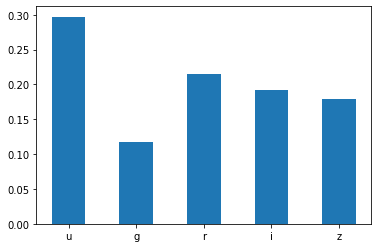

In [ ]:
plt.bar(np.arange(5), etc.feature_importances_, 0.5)
plt.xticks(np.arange(5), X.columns);

#### task 4: **calculate spectral indices & test importance**

hint:
`X_new = X.copy()`



In [ ]:
X_new = X.copy()
X_new["u-g"] = X.u - X.g
X_new["g-r"] = X.g - X.r
X_new["r-z"] = X.r - X.z
X_new["i-z"] = X.i - X.z

X_new

,u,g,r,i,z,u-g,g-r,r-z,i-z
0,19.240999,17.525999,16.840000,16.613001,16.492001,1.715000,0.685999,0.348000,0.121000
1,19.732000,18.339001,17.767000,17.580000,17.481001,1.393000,0.572001,0.285999,0.098999
2,16.120001,15.232000,14.933000,14.845000,14.827000,0.888000,0.299001,0.106000,0.018001
3,18.995001,18.150999,17.877001,17.747000,17.766001,0.844002,0.273998,0.111000,-0.019001
4,19.032000,18.112000,17.848000,17.709999,17.712000,0.920000,0.264000,0.136000,-0.002001
...,...,...,...,...,...,...,...,...,...
862,19.247000,19.047001,18.663000,18.627001,18.671000,0.199999,0.384001,-0.007999,-0.043999
863,26.433001,21.429001,20.261000,20.108000,20.073000,5.004000,1.168001,0.188000,0.035000
864,20.535999,20.200001,20.292999,19.910000,19.726000,0.335999,-0.092999,0.566999,0.184000
865,20.627001,20.583000,20.270000,20.229000,20.190001,0.044001,0.313000,0.080000,0.039000


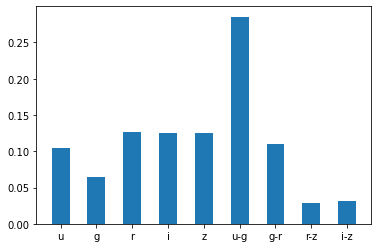

In [ ]:
etc = ExtraTreesClassifier(random_state=420).fit(X_new,y)
plt.bar(np.arange(9), etc.feature_importances_, 0.5)
plt.xticks(np.arange(9), X_new.columns);

#### task 5: **test score if only *u-g* or *i-z* spectral indices are used**

hint: for single columns use `X_new[["u-g"]]`

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new[["u-g"]], y, test_size=0.1, stratify=y, random_state=420)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9655172413793104

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new[["i-z"]], y, test_size=0.1, stratify=y, random_state=420)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7586206896551724

In [ ]:
sum(data.target == "star") / data.target.size

0.7554786620530565

#### task 6: **create dummy column & test importance**

hint:
```
X_new2 = X.copy()
X_new2["dummy"] = np.random.randint(10, size=X.r.size)
```

In [ ]:
X_new2 = X.copy()

X_new2["dummy"] = np.random.normal(0, 1, size=X.r.size)
X_new2["dummy2"] = np.ones_like(X.r)

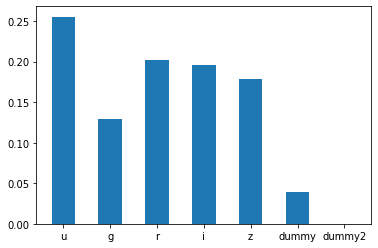

In [ ]:
etc = ExtraTreesClassifier().fit(X_new2,y)
plt.bar(np.arange(7), etc.feature_importances_, 0.5)
plt.xticks(np.arange(7), X_new2.columns);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new2[["dummy"]], y, stratify=y, random_state=420)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7557603686635944

### [**Principal component analysis**](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

<img src="https://programmathically.com/wp-content/uploads/2021/08/pca-2-dimensions-1024x644.png" align=left width=500pt></img>

<br><br>

<img src="https://dimensionless.in/wp-content/uploads/2019/07/pca2.png" align=left width=750pt></img>

<br>
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X)
X_PCA

array([[-1.57855903,  0.69166694],
       [ 0.31005208,  0.36354459],
       [-6.33253416, -0.70006217],
       ...,
       [ 4.73285303, -0.77175228],
       [ 5.29123786, -0.90930764],
       [ 2.27592808, -0.88723164]])

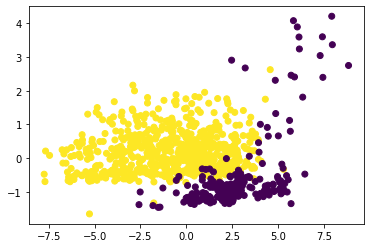

In [ ]:
plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y);

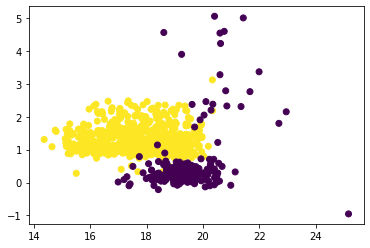

In [ ]:
plt.scatter(X.g, X.u-X.g, c=y);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.1, stratify=y, random_state=42)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9195402298850575

### task 7: **integrate `PCA()` into our pipeline**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=420)

model = make_pipeline(PCA(n_components=3),
                      StandardScaler(),
                      SVC(kernel="linear"))

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9540229885057471

## [**Cross-validation**](https://scikit-learn.org/stable/modules/cross_validation.html)

<img src="https://miro.medium.com/max/1400/1*AAwIlHM8TpAVe4l2FihNUQ.png" width=800pt></img>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=420)

model = make_pipeline(PCA(n_components=3),
                      StandardScaler(),
                      SVC(kernel="linear"))

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9540229885057471

### task 8: **use several different random states when splitting data & get average score**

In [ ]:
scores = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=i)

    model.fit(X_train, y_train)

    scores.append(model.score(X_test, y_test))

scores

[0.9354838709677419,
 0.9493087557603687,
 0.9539170506912442,
 0.9585253456221198,
 0.9447004608294931,
 0.9585253456221198,
 0.9308755760368663,
 0.9539170506912442,
 0.9400921658986175,
 0.9354838709677419]

In [ ]:
np.mean(scores), np.std(scores)

(0.9460829493087557, 0.009677419354838708)

### task 9: **use [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)**

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
res = cross_validate(model, X, y, cv=10)

print(res)

{'fit_time': array([0.01530457, 0.01464748, 0.0144999 , 0.01442313, 0.01615572,
       0.01394105, 0.01501513, 0.01499629, 0.0152204 , 0.01502824]), 'score_time': array([0.00265884, 0.00270629, 0.00274038, 0.00384307, 0.00276804,
       0.0027163 , 0.0027647 , 0.00276279, 0.00295591, 0.0027225 ]), 'test_score': array([0.95402299, 0.94252874, 0.96551724, 0.94252874, 0.94252874,
       0.95402299, 0.95402299, 0.93023256, 0.96511628, 0.97674419])}


In [ ]:
np.mean(res["test_score"]), np.std(res["test_score"])

(0.9527265437048917, 0.013103290409293528)

## **Tuning hyperparameters**

In [ ]:
SVC?

In [ ]:
def decision_surface(X, y, classifier):
    size = 100

    X_n = PCA(n_components=2).fit_transform(X)
    X_n = StandardScaler().fit_transform(X_n)

    range_U = np.linspace(min(X_n[:,0]), max(X_n[:,0]), size)
    range_G = np.linspace(min(X_n[:,1]), max(X_n[:,1]), size)
    U, G = np.meshgrid(range_U, range_G)

    grid = np.vstack((U.flatten(), G.flatten())).T

    classifier.fit(X_n, y)

    predicted = classifier.predict_proba(grid)[:,0]

    predicted = predicted.reshape(size,size)

    plt.contourf(U, G, predicted, cmap="coolwarm", alpha=0.5)

    plt.plot(X_n[:,0][data.target == "star"], X_n[:,1][data.target == "star"], "o")
    plt.plot(X_n[:,0][data.target == "QSO"], X_n[:,1][data.target == "QSO"], "o");

    plt.xlabel("U [mag]")
    plt.ylabel("G [mag]");

def classify(X, y, classifier):
    model = make_pipeline(PCA(n_components=3),
                          StandardScaler(),
                          classifier)

    res = cross_validate(model, X, y, cv=10)
    print(np.mean(res["test_score"]))

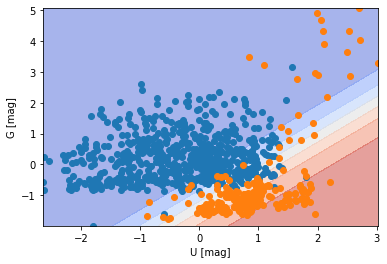

In [ ]:
decision_surface(X, y, SVC(kernel="linear", probability=True))

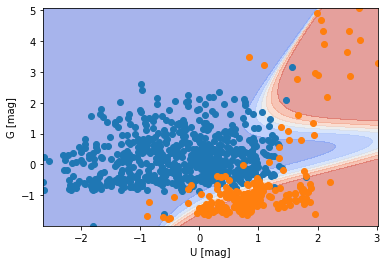

In [ ]:
decision_surface(X, y, SVC(kernel="poly", probability=True))

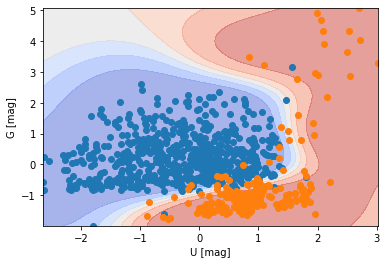

In [ ]:
decision_surface(X, y, SVC(kernel="rbf", C=1, probability=True))

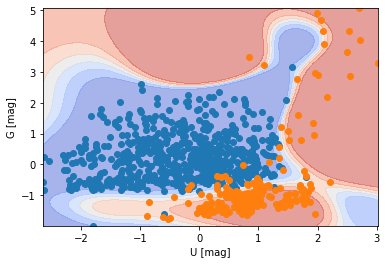

In [ ]:
decision_surface(X, y, SVC(kernel="rbf", C=1000, probability=True))

#### task 10: **find SVC hyperparameters with best test score**

In [ ]:
classify(X, y, SVC(kernel="linear"))

0.9527265437048917


In [ ]:
classify(X, y, SVC(kernel="linear", C=10))

0.9481154771451484


In [ ]:
classify(X, y, SVC(kernel="linear", C=0.1))

0.9561881849772786


In [ ]:
classify(X, y, SVC(kernel="poly", degree=1))

0.9550387596899224


In [ ]:
classify(X, y, SVC(kernel="poly", degree=3))

0.9711307137129112


In [ ]:
classify(X, y, SVC(kernel="rbf", C=10))

0.9838679497460572


### **Grid-search + crossvalidation**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
C = [0.01, 0.1, 1, 10, 100]
gamma = [0.1, 1, 10, 100]

params = {"C" : C,
          "gamma" : gamma}

model = GridSearchCV(SVC(kernel="rbf"), params, cv=10, n_jobs=4)
model.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=4,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.1, 1, 10, 100]})

In [ ]:
model.cv_results_

{'mean_fit_time': array([0.07599914, 0.09040411, 0.11826148, 0.1720979 , 0.07104983,
        0.06413922, 0.11293702, 0.19308898, 0.03929267, 0.04360352,
        0.1040098 , 0.19172583, 0.02498248, 0.04383473, 0.14040828,
        0.19308612, 0.03189874, 0.03349431, 0.19183743, 0.17473814]),
 'std_fit_time': array([0.01091094, 0.02175377, 0.01823785, 0.03225414, 0.01132017,
        0.0111591 , 0.03546798, 0.03610552, 0.01208333, 0.01511459,
        0.02728793, 0.0378376 , 0.00788161, 0.0136504 , 0.0389555 ,
        0.02915827, 0.00792941, 0.00981139, 0.03552759, 0.04512377]),
 'mean_score_time': array([0.01605725, 0.01499958, 0.0205847 , 0.02599237, 0.01539836,
        0.01321368, 0.02134302, 0.02312748, 0.01159654, 0.00874801,
        0.01641662, 0.01983488, 0.00687113, 0.00942988, 0.01392205,
        0.02052071, 0.00531757, 0.00888705, 0.02028551, 0.02049327]),
 'std_score_time': array([0.00617245, 0.00440863, 0.00397544, 0.00790913, 0.01189163,
        0.00657206, 0.00632088, 0.008584

In [ ]:
pars, score = model.cv_results_["params"], model.cv_results_["mean_test_score"]

indices = np.argsort(score)

for i in indices:
    print(pars[i], score[i].round(3))

{'C': 0.01, 'gamma': 0.1} 0.755
{'C': 0.01, 'gamma': 1} 0.755
{'C': 0.01, 'gamma': 10} 0.755
{'C': 0.01, 'gamma': 100} 0.755
{'C': 0.1, 'gamma': 100} 0.755
{'C': 1, 'gamma': 100} 0.762
{'C': 10, 'gamma': 100} 0.782
{'C': 100, 'gamma': 100} 0.782
{'C': 0.1, 'gamma': 10} 0.804
{'C': 100, 'gamma': 10} 0.946
{'C': 1, 'gamma': 10} 0.946
{'C': 10, 'gamma': 10} 0.946
{'C': 0.1, 'gamma': 1} 0.946
{'C': 0.1, 'gamma': 0.1} 0.952
{'C': 1, 'gamma': 0.1} 0.971
{'C': 1, 'gamma': 1} 0.975
{'C': 100, 'gamma': 0.1} 0.978
{'C': 100, 'gamma': 1} 0.98
{'C': 10, 'gamma': 0.1} 0.982
{'C': 10, 'gamma': 1} 0.983


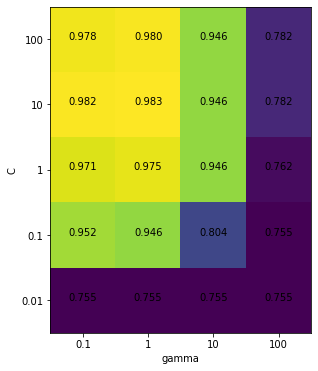

In [ ]:
res = model.cv_results_

plt.figure(figsize=(len(C)*1.5,len(gamma)*1.5))
plt.imshow(res["mean_test_score"].reshape(len(C), len(gamma)), origin="lower")
n = 0
for i in range(len(C)):
    for j in range(len(gamma)):
        plt.text(j,i,"{0:.3f}".format(res["mean_test_score"][n]), ha="center")
        n += 1

plt.ylabel("C")
plt.xlabel("gamma")
plt.yticks(np.arange(len(params["C"])), params["C"]);
plt.xticks(np.arange(len(params["gamma"])), params["gamma"]);

In [ ]:
model.best_estimator_, model.best_score_

(SVC(C=10, gamma=1), 0.9826784282277468)

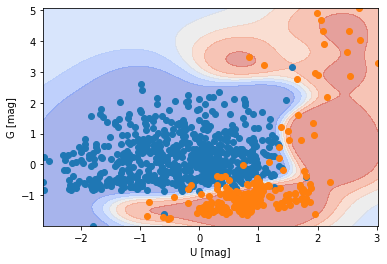

In [ ]:
decision_surface(X, y, SVC(kernel="rbf", C=10, gamma=1, probability=True))

## **Classifier comparison**

In [ ]:
from sklearn.neural_network import MLPClassifier # multi-layer perceptron classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
classifiers = [SVC(kernel="rbf", C=10, gamma=1),
               DecisionTreeClassifier(),
               MLPClassifier(max_iter=1000),
               GaussianNB(),
               KNeighborsClassifier()]

for classifier in classifiers:
    print(classifier)
    classify(X, y, classifier)
    print()

SVC(C=10, gamma=1)
0.9896017107725207

DecisionTreeClassifier()
0.9584603047313554

MLPClassifier(max_iter=1000)
0.9861668003207698

GaussianNB()
0.8950013365410319

KNeighborsClassifier()
0.9850173750334136



## **Ensemble methods**

### **Various hyper-parameters**

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
classifiers = [("Linear", SVC(kernel="linear")),
               ("Quadratic", SVC(kernel="poly", degree=2))]

model = make_pipeline(PCA(n_components=3),
                      StandardScaler(),
                      StackingClassifier(classifiers))

res = cross_validate(model, X, y, cv=10)
np.mean(res["test_score"]), np.std(res["test_score"])

(0.9653702218658115, 0.015581850256831519)

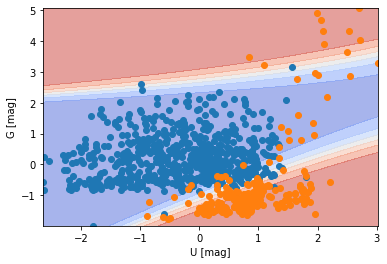

In [ ]:
decision_surface(X, y, StackingClassifier(classifiers))

### **Random forest**

In [ ]:
classifiers = [("One", DecisionTreeClassifier(random_state=1)),
               ("Two", DecisionTreeClassifier(random_state=2)),
               ("Three", DecisionTreeClassifier(random_state=3)),
               ("Four", DecisionTreeClassifier(random_state=4))]

model = make_pipeline(PCA(n_components=3),
                      StandardScaler(),
                      StackingClassifier(classifiers))

res = cross_validate(model, X, y, cv=10)
np.mean(res["test_score"]), np.std(res["test_score"])

(0.9618952151831062, 0.02008269760839265)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = make_pipeline(PCA(n_components=3),
                      StandardScaler(),
                      RandomForestClassifier(n_estimators=100))

res = cross_validate(model, X, y, cv=10)
np.mean(res["test_score"]), np.std(res["test_score"])

(0.9757818765036086, 0.01891295762572299)

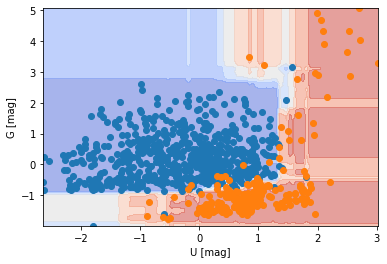

In [ ]:
decision_surface(X, y, RandomForestClassifier(n_estimators=100))

### **Stacking multiple methods**

In [ ]:
classifiers = [("SVC", SVC(kernel="rbf", C=10, gamma=1)),
               ("RFC", RandomForestClassifier()),
               ("MLP", MLPClassifier(max_iter=1000)),
               ("Bayes", GaussianNB()),
               ("KNN", KNeighborsClassifier())]

model = make_pipeline(PCA(n_components=3),
                      StandardScaler(),
                      StackingClassifier(classifiers))

res = cross_validate(model, X, y, cv=10)
np.mean(res["test_score"]), np.std(res["test_score"])

(0.9896284415931568, 0.006195037090662189)

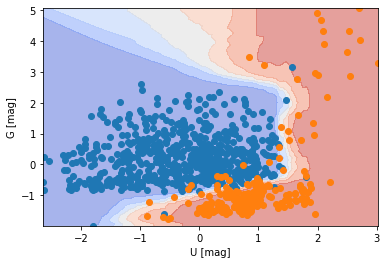

In [ ]:
decision_surface(X, y, StackingClassifier(classifiers))

## **Performance evaluation**

### **[`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) and [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)**

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [ ]:
classifiers = [("SVC", SVC(kernel="rbf", C=10, gamma=1)),
               ("RFC", RandomForestClassifier()),
               ("MLP", MLPClassifier(max_iter=1000)),
               ("Bayes", GaussianNB()),
               ("KNN", KNeighborsClassifier())]

model = make_pipeline(PCA(n_components=3),
                      StandardScaler(),
                      StackingClassifier(classifiers))

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.946     1.000     0.972        53
           1      1.000     0.982     0.991       164

    accuracy                          0.986       217
   macro avg      0.973     0.991     0.982       217
weighted avg      0.987     0.986     0.986       217



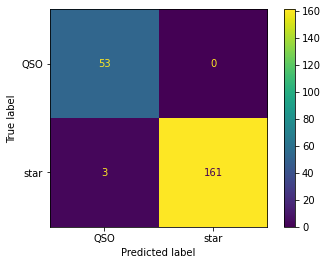

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=["QSO", "star"]);

## **Conclusion**

0.9896284415931568 0.006195037090662189


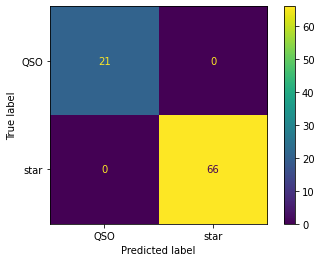

In [ ]:
# Data preparation
X = data[["u","g","r","i","z"]]
le = LabelEncoder()
y = le.fit_transform(data["target"])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=420)

# Stacking classifiers
classifiers = [("SVC", SVC(kernel="rbf", C=10, gamma=1)),
               ("RFC", RandomForestClassifier()),
               ("MLP", MLPClassifier(max_iter=1000)),
               ("Bayes", GaussianNB()),
               ("KNN", KNeighborsClassifier())]

# Making a pipeline
model = make_pipeline(PCA(n_components=3),
                      StandardScaler(),
                      StackingClassifier(classifiers))

# Fitting a model for train data
model.fit(X_train, y_train)

# Testing a model on test data
score = model.score(X_test, y_test)
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=["QSO", "star"]);

# Cross-validation
res = cross_validate(model, X, y, cv=10)
print(np.mean(res["test_score"]), np.std(res["test_score"]))

## **Model inference**

In [ ]:
classifiers = [("SVC", SVC(kernel="rbf", C=10, gamma=1)),
               ("RFC", RandomForestClassifier()),
               ("MLP", MLPClassifier(max_iter=1000)),
               ("Bayes", GaussianNB()),
               ("KNN", KNeighborsClassifier())]

model = make_pipeline(PCA(n_components=3),
                      StandardScaler(),
                      StackingClassifier(classifiers))

model.fit(X, y)

Pipeline(steps=[('pca', PCA(n_components=3)),
                ('standardscaler', StandardScaler()),
                ('stackingclassifier',
                 StackingClassifier(estimators=[('SVC', SVC(C=10, gamma=1)),
                                                ('RFC',
                                                 RandomForestClassifier()),
                                                ('MLP',
                                                 MLPClassifier(max_iter=1000)),
                                                ('Bayes', GaussianNB()),
                                                ('KNN',
                                                 KNeighborsClassifier())]))])

### task 11: **pick an object from SDSS and classify it**

http://skyserver.sdss.org/dr7/en/tools/search/radial.asp

In [ ]:
u = 15.914
g = 15.500
r = 16.2
i = 16.5
z = 17.1

X_real = pd.DataFrame(np.array([[u,g,r,i,z]]), columns=["u","g","r","i","z"])

X_real

,u,g,r,i,z
0,15.914,15.5,16.2,16.5,17.1


In [ ]:
pred = model.predict(X_real)

le.inverse_transform(pred)

array(['star'], dtype=object)

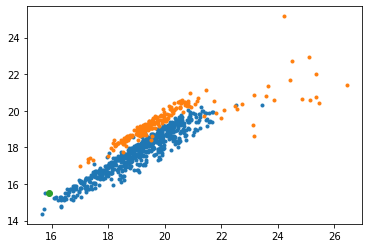

In [ ]:
plt.plot(X.u[y == 1], X.g[y == 1], ".")
plt.plot(X.u[y == 0], X.g[y == 0], ".")
plt.plot(u, g, "o")